**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

**Load and Preprocess the Dataset**

In [ ]:
# Load dataset (Replace with actual dataset file)
df = pd.read_csv("/content/Mall_Customers.csv")

# Selecting relevant features
features = ['Annual Income (k$)', 'Spending Score (1-100)']
df_selected = df[features]

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)


**Evaluation Function**

In [ ]:
# Function to compute Elbow Method, Silhouette Score, and MSE for different distance metrics
def evaluate_clustering(df, metric, max_k=10):
    wcss = []  # Within-Cluster Sum of Squares
    silhouette_scores = []  # Silhouette Score
    mse_scores = []  # Mean Squared Error

    for k in range(2, max_k + 1):
        # Compute distance matrix for non-Euclidean metrics
        if metric == "manhattan":
            dist_matrix = cdist(df, df, metric="cityblock")
        elif metric == "cosine":
            dist_matrix = cdist(df, df, metric="cosine")
        elif metric == "mahalanobis":
            VI = np.linalg.inv(np.cov(df.T))  # Compute inverse covariance matrix
            dist_matrix = cdist(df, df, metric="mahalanobis", VI=VI)
        else:  # Default: Euclidean
            dist_matrix = cdist(df, df, metric="euclidean")

        # Apply k-Means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df)

        # Compute metrics
        wcss.append(kmeans.inertia_)  # WCSS (Elbow Method)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_, metric=metric))
        mse_scores.append(mean_squared_error(df, kmeans.cluster_centers_[kmeans.labels_]))  # MSE

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), wcss, marker="o", linestyle="--", color="b", label="WCSS")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    plt.title(f"Elbow Method for Optimal k ({metric} Distance)")
    plt.legend()
    plt.show()

    # Plot Silhouette Score
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker="o", linestyle="--", color="g", label="Silhouette Score")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Score for Optimal k ({metric} Distance)")
    plt.legend()
    plt.show()

    # Plot Mean Squared Error (MSE)
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), mse_scores, marker="o", linestyle="--", color="r", label="MSE")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"Mean Squared Error for k-Means ({metric} Distance)")
    plt.legend()
    plt.show()

    # Find the best k using silhouette score
    best_k = np.argmax(silhouette_scores) + 2  # Since range starts at k=2
    print(f"Optimal k for {metric} Distance: {best_k}")

    return best_k, mse_scores[best_k - 2]  # Return best k and corresponding MSE


**Run Evaluation for Different Distance Metrics**

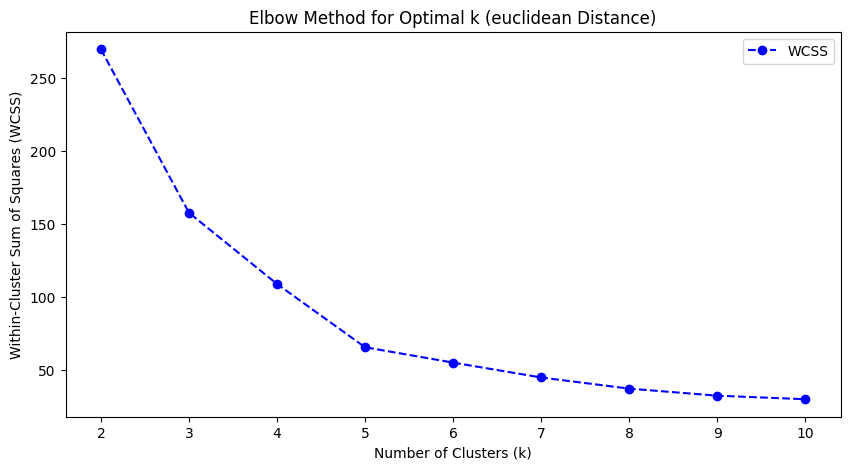

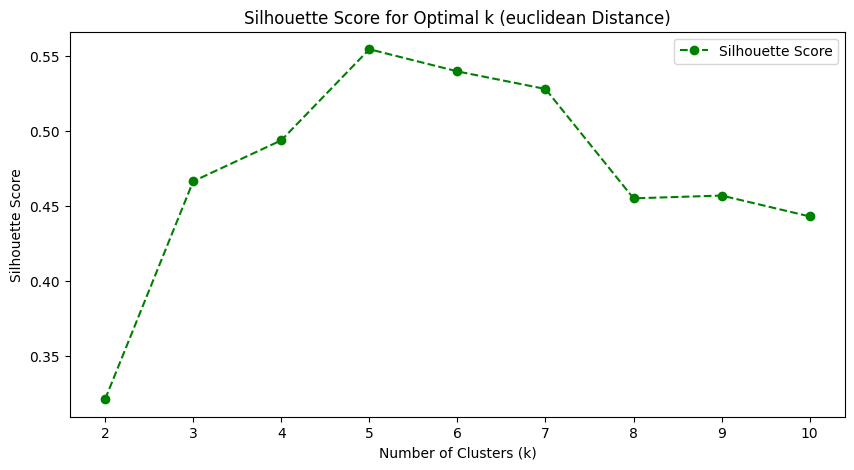

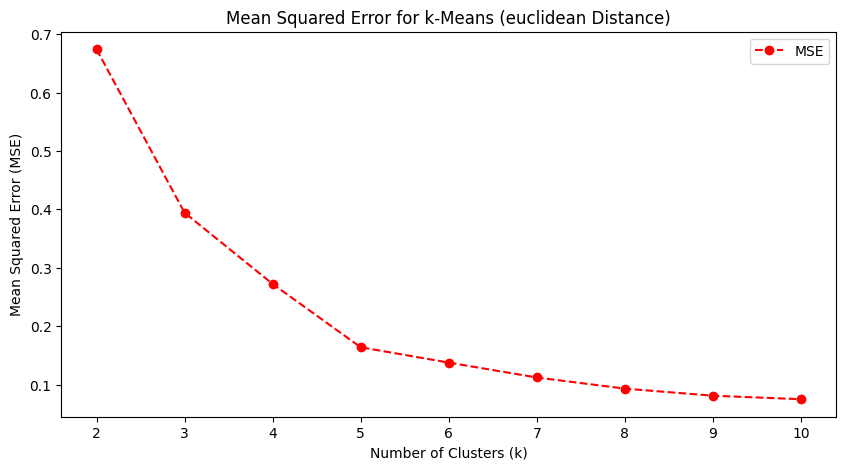

Optimal k for euclidean Distance: 5


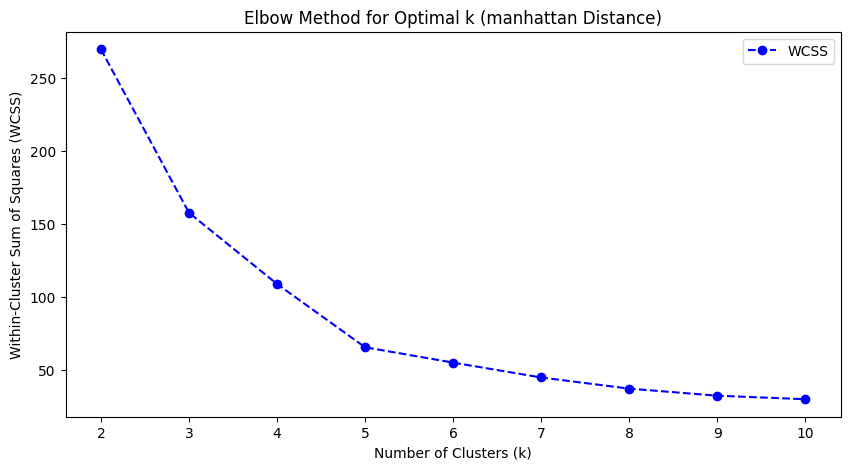

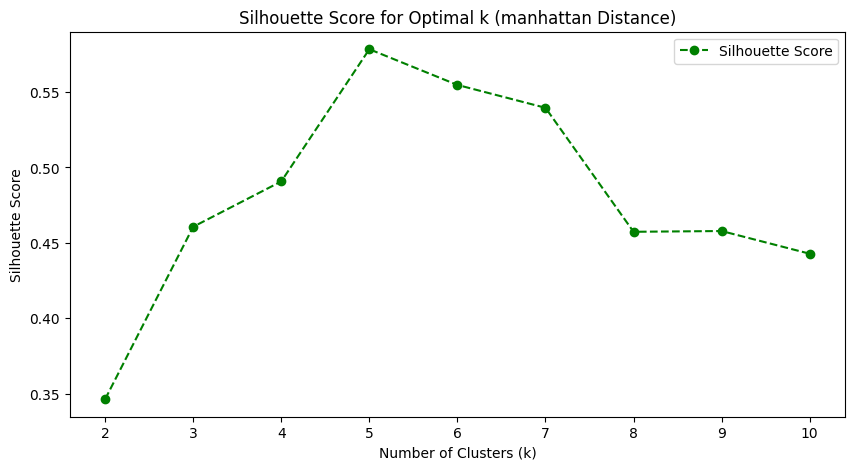

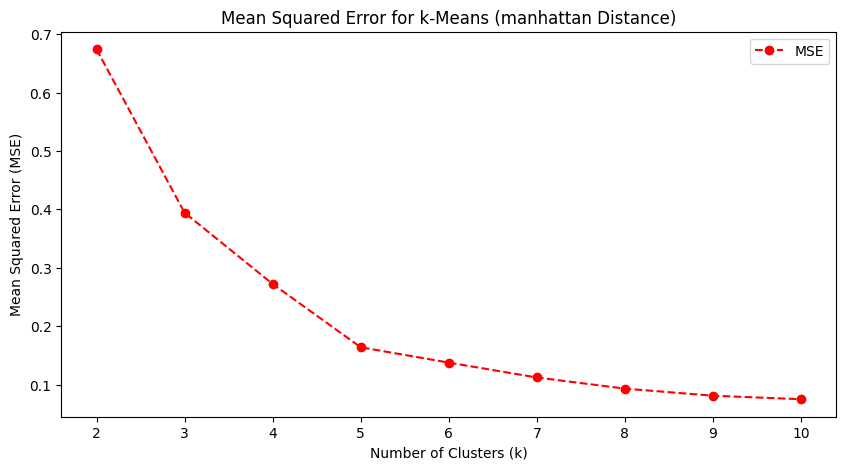

Optimal k for manhattan Distance: 5


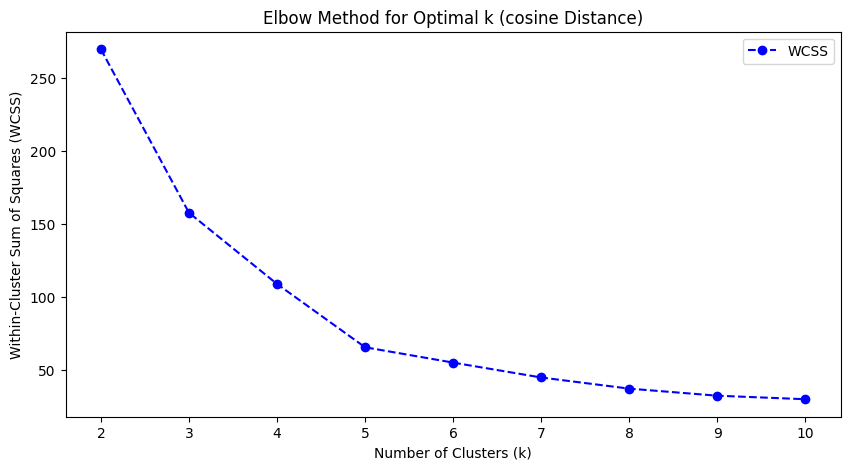

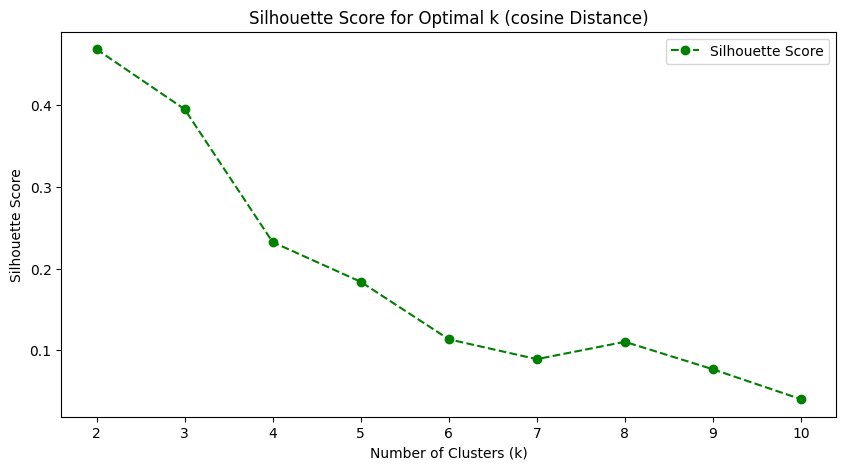

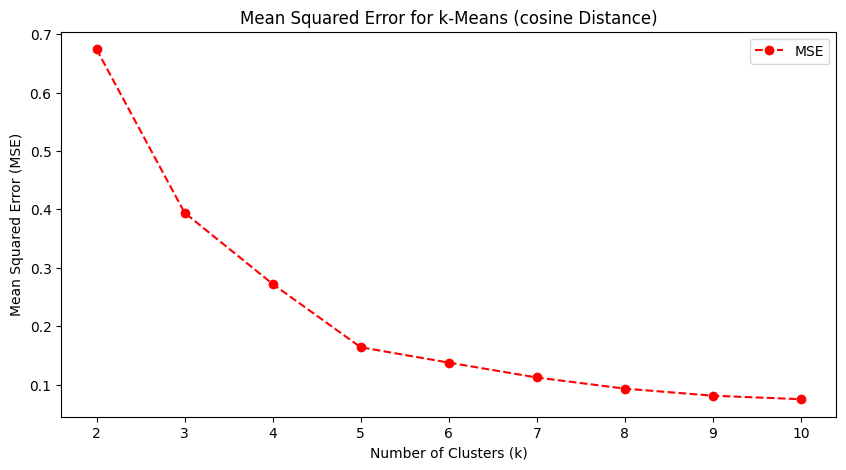

Optimal k for cosine Distance: 2


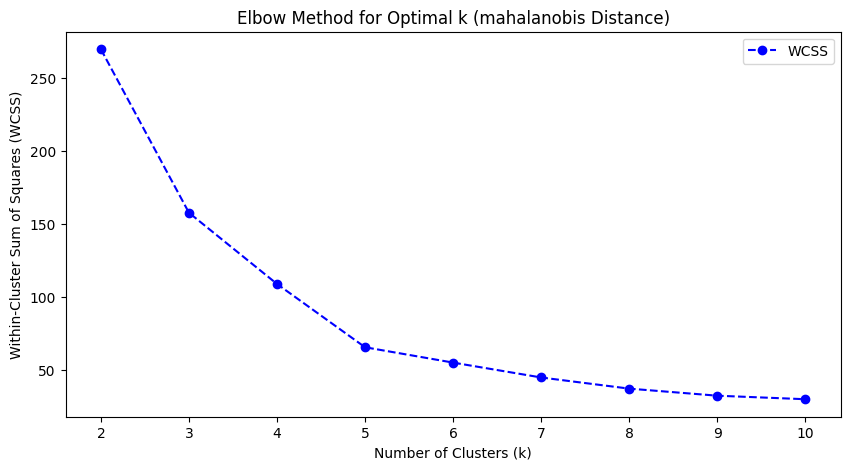

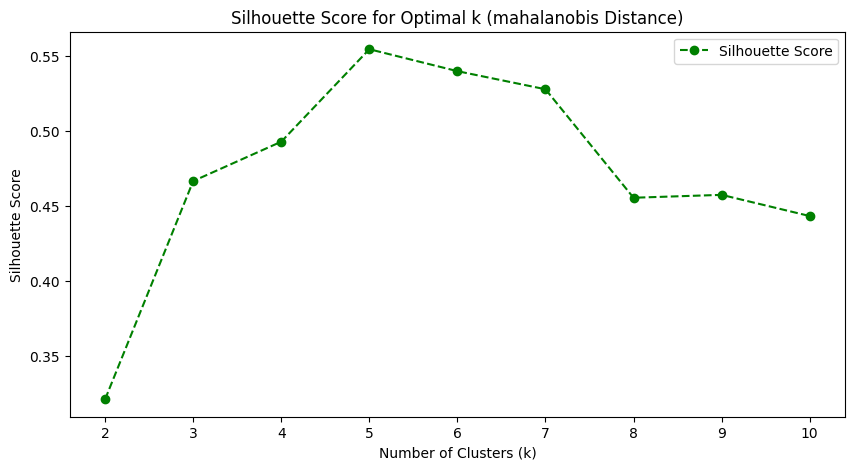

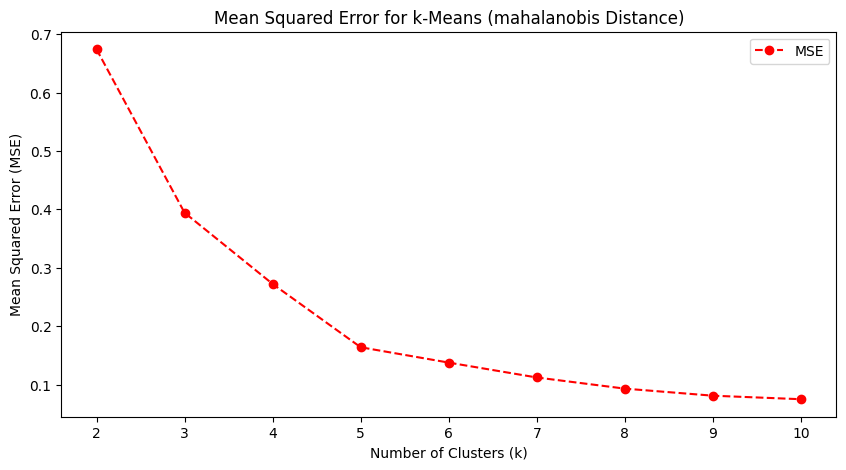

Optimal k for mahalanobis Distance: 5


In [ ]:
# Define distance metrics
metrics = ["euclidean", "manhattan", "cosine", "mahalanobis"]
optimal_k_values = {}
mse_results = {}

# Run evaluation for each distance metric
for metric in metrics:
    best_k= evaluate_clustering(df_scaled, metric)
    optimal_k_values[metric] = best_k

**Compare MSE Across Distance Metrics**

In [ ]:
print("\nComparison of Mean Squared Error (MSE) for Different Distance Metrics:")
for metric, mse in mse_results.items():
    print(f"{metric.capitalize()} Distance → MSE: {mse:.4f}")


Comparison of Mean Squared Error (MSE) for Different Distance Metrics:
Euclidean Distance → MSE: 0.1639
Manhattan Distance → MSE: 0.1639
Cosine Distance → MSE: 0.6742
Mahalanobis Distance → MSE: 0.1639


**Apply k-Means for Each Metric Using Optimal k**

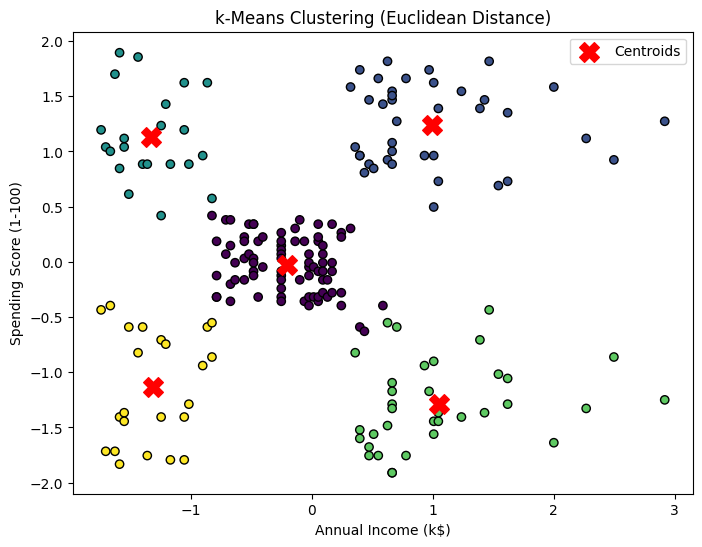

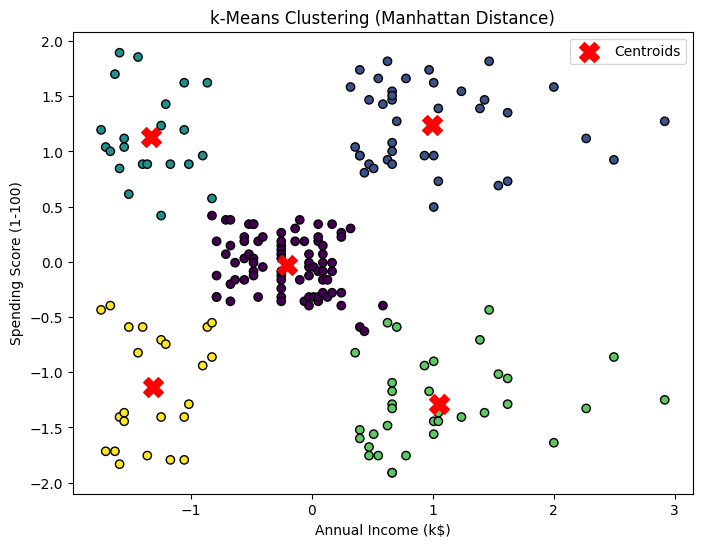

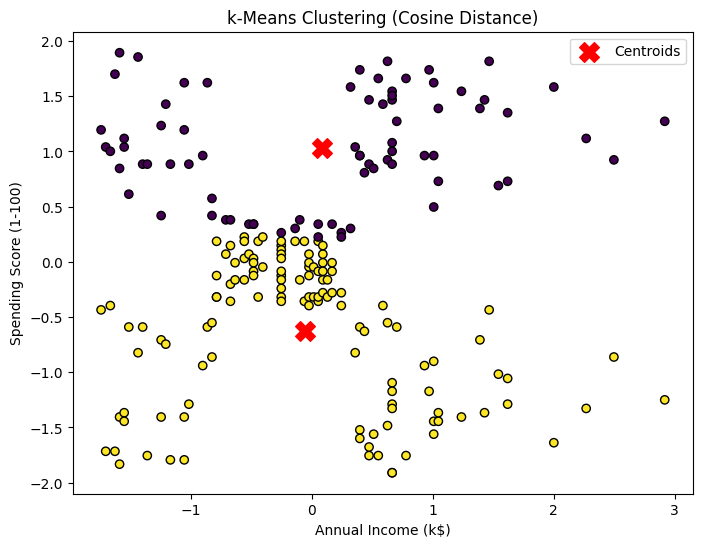

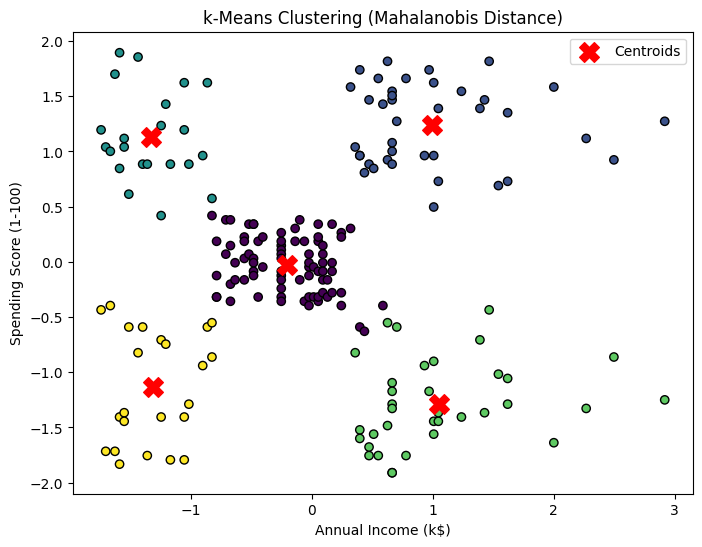

In [ ]:
# Dictionary to store clustering results
cluster_results = {}

# Apply k-Means for each metric with optimal k
for metric, k in optimal_k_values.items():
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)

    cluster_results[metric] = {"k": k, "labels": labels, "centroids": kmeans.cluster_centers_}

    # Plot Clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=labels, cmap='viridis', marker="o", edgecolor="black")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker="X", s=200, label="Centroids")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"k-Means Clustering ({metric.capitalize()} Distance)")
    plt.legend()
    plt.show()
